In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import pandas
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns


pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
#hide
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Loading data

In [3]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# Data cleaning + Feature Engineering

In [4]:
df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [5]:
[print(f"{col:25}\t{df[col].dtype}\t{df[col].nunique()}") for col in df.columns];

Id                       	int64	1460
MSSubClass               	int64	15
MSZoning                 	object	5
LotFrontage              	float64	110
LotArea                  	int64	1073
Street                   	object	2
Alley                    	object	2
LotShape                 	object	4
LandContour              	object	4
Utilities                	object	2
LotConfig                	object	5
LandSlope                	object	3
Neighborhood             	object	25
Condition1               	object	9
Condition2               	object	8
BldgType                 	object	5
HouseStyle               	object	8
OverallQual              	int64	10
OverallCond              	int64	9
YearBuilt                	int64	112
YearRemodAdd             	int64	61
RoofStyle                	object	6
RoofMatl                 	object	8
Exterior1st              	object	15
Exterior2nd              	object	16
MasVnrType               	object	4
MasVnrArea               	float64	327
ExterQual                	object	4
ExterCo

In [6]:
# Combine the ["MoSold","YrSold"] columns into a single datetime column ['DateSold'] 
# and drop the original columns; make a bunch of new columns out of the new ['DateSold'] col

df['DateSold'] = pd.to_datetime(df.YrSold.astype(str) + '/' + df.MoSold.astype(str) + '/01')
df.drop(['MoSold', 'YrSold'], axis=1, inplace=True)
add_datepart(df, 'DateSold')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,DateSoldYear,DateSoldMonth,DateSoldWeek,DateSoldDay,DateSoldDayofweek,DateSoldDayofyear,DateSoldIs_month_end,DateSoldIs_month_start,DateSoldIs_quarter_end,DateSoldIs_quarter_start,DateSoldIs_year_end,DateSoldIs_year_start,DateSoldElapsed
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,208500,2008,2,5,1,4,32,False,True,False,False,False,False,1.201824e+09
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,181500,2007,5,18,1,1,121,False,True,False,False,False,False,1.177978e+09
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,223500,2008,9,36,1,0,245,False,True,False,False,False,False,1.220227e+09
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,WD,Abnorml,140000,2006,2,5,1,2,32,False,True,False,False,False,False,1.138752e+09
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,250000,2008,12,49,1,0,336,False,True,False,False,False,False,1.228090e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,175000,2007,8,31,1,2,213,False,True,False,False,False,False,1.185926e+09
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Mi

In [7]:
dep_var = 'SalePrice' # dependent variable
df[dep_var] = np.log(df[dep_var]) # evaluation criterion is the RMSE of the logarithm

In [8]:
# separate continuous and categorial variables based on cardinality
cont,cat = cont_cat_split(df, 25, dep_var=dep_var) # the highest categorical data had cardinality = 25

In [9]:
print(cont)
print(cat)

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'DateSoldElapsed']
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 

In [10]:
# Categorify: https://docs.fast.ai/tabular.core.html#Categorify
# FillMissing: https://docs.fast.ai/tabular.core.html#FillMissing
# Normalize: https://docs.fast.ai/data.transforms.html#Normalize
procs = [Categorify, FillMissing, Normalize]

In [11]:
# This is not an extrapolation problem; the test set does not contain points 
# boyond the region of validity of the training set; hence, we do a random 80-20 split
# of the training set into train + valid

splits = RandomSplitter(valid_pct=0.3, seed=0)(range_of(df))

In [12]:
# TabularPandas: https://docs.fast.ai/tabular.core.html#TabularPandas
to = TabularPandas(df, procs, cat, cont, dep_var, splits=splits)

In [13]:
print(cont)
print(cat)

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'DateSoldElapsed']
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 

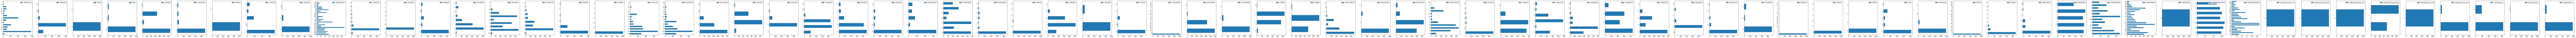

In [14]:
fig, axs = plt.subplots(ncols=len(cat), nrows=1, figsize=(len(cat)*5, 5))

for idx, col in enumerate(cat):
    to.train.xs[col].value_counts(sort=False).plot.barh(ax=axs[idx], label=col)
    axs[idx].legend()

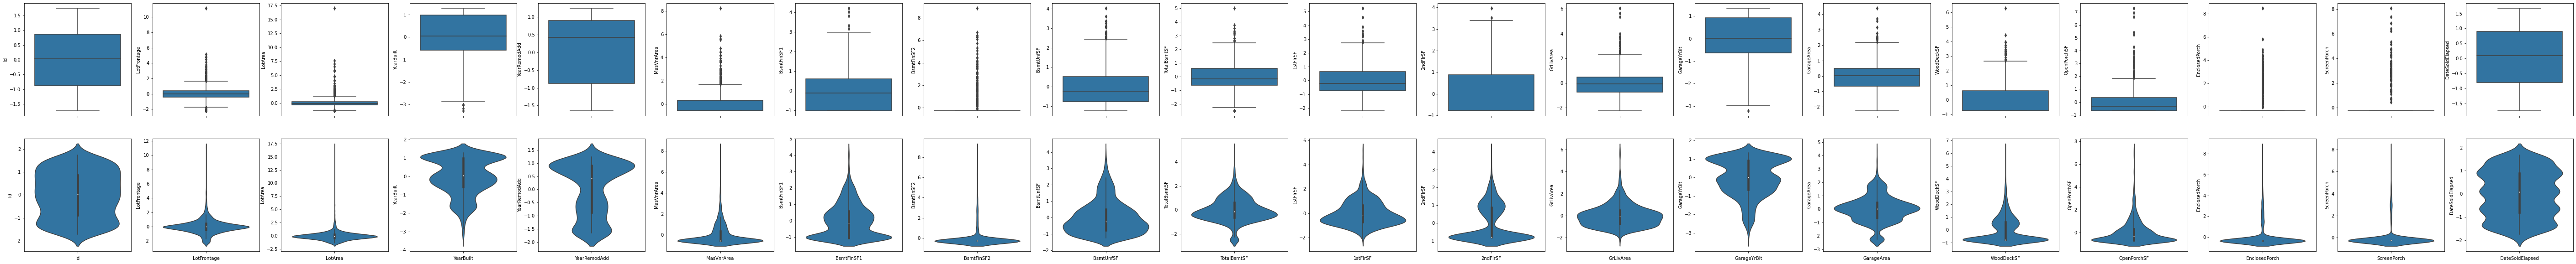

In [15]:
fig, axs = plt.subplots(ncols=len(cont), nrows=2, figsize=(len(cont)*5, 10))

for idx, col in enumerate(cont):
    sns.boxplot(y=to.train.xs[col], ax=axs[0,idx])
    sns.violinplot(y=to.train.xs[col], ax=axs[1,idx])
    axs[1,idx].set_xlabel(col)

OUTLIERS?

In [16]:
# Metrics for evaluation: Root-Mean-Squared-Error (RMSE) between the logarithm of the 
# predicted value and the logarithm of the observed sales price
# https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/evaluation

def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [17]:
# Split into train + valid

xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y
len(to.train),len(to.valid)

(1022, 438)

# Model Building

## Decision Tree Regressor

In [18]:
dtr = DecisionTreeRegressor()
dtr.fit(xs, y)
m_rmse(dtr, xs, y), m_rmse(dtr, valid_xs, valid_y)

(0.0, 0.228621)

This gives a 0.0 training set error (exact predictions), but generalises badly to the validation set. Hence we do some hyperparameter tuning.

In [19]:
# Hyperparameter tuning

from sklearn.model_selection import GridSearchCV

param_grid = {"splitter": ["best", "random"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              "min_weight_fraction_leaf": [0.1, 0.3, 0.5],
              }

dtr = DecisionTreeRegressor()

clf = GridSearchCV(estimator=dtr, 
                   param_grid=param_grid,
                   scoring='neg_root_mean_squared_error',
                   n_jobs=-1)

clf.fit(xs, y)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_))

Best parameters: {'max_depth': 6, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
Lowest RMSE:  0.22461746078812733


In [20]:
# Ouptut: Best parameters: {'max_depth': 6, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
# Lowest RMSE:  0.2349359993399057

# Saving the output so that we don't run the above cell multiple times

In [21]:
dtr = DecisionTreeRegressor(max_depth=6, max_leaf_nodes=20, 
                          min_samples_leaf=20, min_samples_split=10,
                         min_weight_fraction_leaf=0.1)
dtr.fit(xs, y)
m_rmse(dtr, xs, y), m_rmse(dtr, valid_xs, valid_y)

(0.215144, 0.234927)

## Random Forest Regressor

In [22]:
rfr = RandomForestRegressor()
rfr.fit(xs, y)
m_rmse(rfr, xs, y), m_rmse(rfr, valid_xs, valid_y)

(0.056147, 0.139516)

In [23]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'n_estimators': [5,20,50,100],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 120, num = 12)],
               'min_samples_split': [2, 6, 10],
               'min_samples_leaf': [1, 3, 4],
               'bootstrap': [True, False]}


rfr = RandomForestRegressor()

clf = RandomizedSearchCV(estimator=rfr, 
                   param_distributions=random_grid,
                   scoring='neg_root_mean_squared_error',
                   n_jobs=-1)

clf.fit(xs, y)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_))

Best parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': True}
Lowest RMSE:  0.15548392153249765


In [24]:
# Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': True}
# Lowest RMSE:  0.1509913147378329

In [25]:
def rf(xs, y, n_estimators=100, min_samples_split=6, min_samples_leaf=4,
       max_features='sqrt',max_depth=20, bootstrap=True, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
                                 min_samples_split=min_samples_split,
                                 min_samples_leaf=min_samples_leaf,
                                 max_features=max_features,
                                 max_depth=max_depth,
                                 oob_score=True).fit(xs, y)

In [26]:
rfr = rf(xs, y)
m_rmse(rfr, xs, y), m_rmse(rfr, valid_xs, valid_y)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


(0.106568, 0.14602)

In [27]:
def rf_feat_importance(rfr, df):
    return pd.DataFrame({'cols':df.columns, 'imp':rfr.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [28]:
fi = rf_feat_importance(rfr, xs)
fi[:10]

,cols,imp
14,OverallQual,0.107879
86,GrLivArea,0.098091
77,YearBuilt,0.070927
47,GarageCars,0.056355
83,TotalBsmtSF,0.056201
36,FullBath,0.053180
84,1stFlrSF,0.048263
88,GarageArea,0.043390
40,KitchenQual,0.042518
21,ExterQual,0.042465


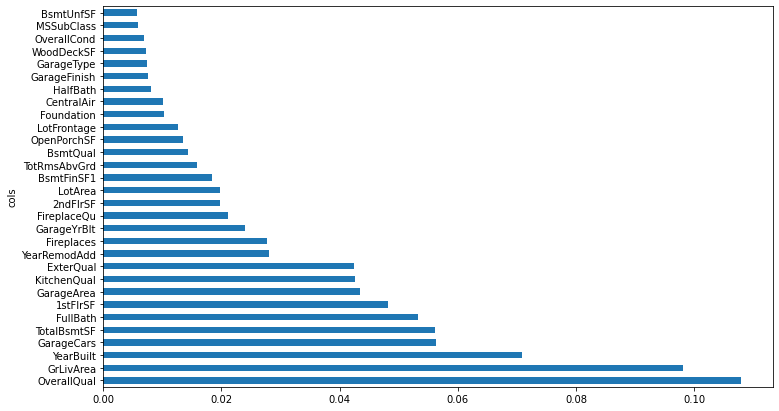

In [29]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

In [30]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

34

In [31]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [32]:
rfr = rf(xs_imp, y)
m_rmse(rfr, xs_imp, y), m_rmse(rfr, valid_xs_imp, valid_y)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


(0.1044, 0.142851)

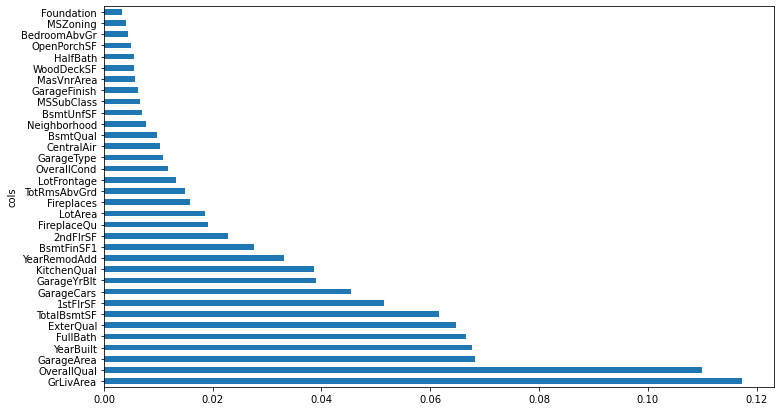

In [33]:
plot_fi(rf_feat_importance(rfr, xs_imp));

In [34]:
len(xs.columns), len(xs_imp.columns)

(94, 34)

## Removing Redundant Features

In [35]:
!pip install -Uqq fastbook
import fastbook
from fastbook import *

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
explainable-ai-sdk 1.3.2 requires xai-image-widget, which is not installed.
tensorflow 2.6.2 requires numpy~=1.19.2, but you have numpy 1.20.3 which is incompatible.
tensorflow 2.6.2 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
tensorflow 2.6.2 requires typing-extensions~=3.7.4, but you have typing-extensions 3.10.0.2 which is incompatible.
tensorflow 2.6.2 requires wrapt~=1.12.1, but you have wrapt 1.13.3 which is incompatible.
tensorflow-transform 1.5.0 requires absl-py<0.13,>=0.9, but you have absl-py 0.15.0 which is incompatible.
tensorflow-transform 1.5.0 requires numpy<1.20,>=1.16, but you have numpy 1.20.3 which is incompatible.
tensorflow-transform 1.5.0 requires pyarrow<6,>=1, but you have p

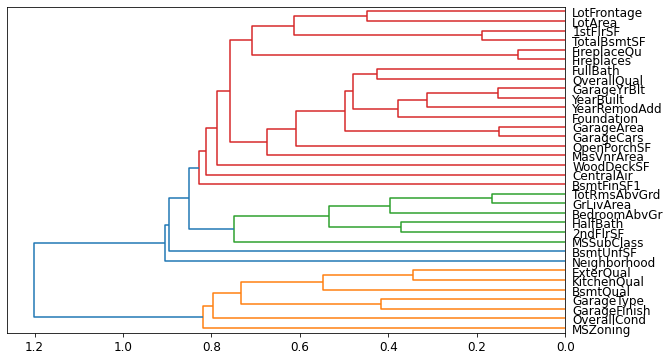

In [36]:
cluster_columns(xs_imp)

In [37]:
def get_oob(df):
    rfr = RandomForestRegressor(n_jobs=-1, n_estimators=100, min_samples_split=2, min_samples_leaf=15,
       max_features='sqrt',max_depth=20, bootstrap=True, oob_score=True)
    rfr.fit(df, y)
    return rfr.oob_score_

In [38]:
get_oob(xs_imp)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


0.8268540564947553

In [39]:
{c:get_oob(xs_imp.drop(c, axis=1)) for c in (
    'FireplaceQu','Fireplaces',
    'GrLivArea', 'TotRmsAbvGrd', 
    'GarageArea', 'GarageCars',
    'GarageYrBlt', 'YearBuilt',
    '1stFlrSF', 'TotalBsmtSF')}

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feat

{'FireplaceQu': 0.8259081543524507,
 'Fireplaces': 0.8264295452978183,
 'GrLivArea': 0.8108567271738129,
 'TotRmsAbvGrd': 0.8259776673915413,
 'GarageArea': 0.8308995176999371,
 'GarageCars': 0.8276809046373231,
 'GarageYrBlt': 0.8274403888657655,
 'YearBuilt': 0.8257192593602692,
 '1stFlrSF': 0.8287347215077092,
 'TotalBsmtSF': 0.8235466474505067}

In [40]:
to_drop = ['FireplaceQu', 'TotRmsAbvGrd', 'GarageArea', 'GarageYrBlt', '1stFlrSF']
get_oob(xs_imp.drop(to_drop, axis=1))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


0.8346388655401575

In [41]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

In [42]:
# saving final versions

save_pickle('/kaggle/working/xs_final.pkl', xs_final)
save_pickle('/kaggle/working/valid_xs_final.pkl', valid_xs_final)

In [43]:
# loading them back

xs_final = load_pickle('/kaggle/working/xs_final.pkl')
valid_xs_final = load_pickle('/kaggle/working/valid_xs_final.pkl')

In [44]:
rfr = rf(xs_final, y)
m_rmse(rfr, xs_final, y), m_rmse(rfr, valid_xs_final, valid_y)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


(0.105759, 0.141392)

## Partial Dependence

As we've seen, the two most important predictors are `GrLivArea` and `OverallQual`. We'd like to understand the relationship between these predictors and sale price. It's a good idea to first check the count of values per category (provided by the Pandas value_counts method), to see how common each category is:

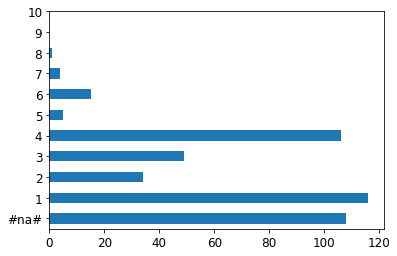

In [45]:
p = valid_xs_final['OverallQual'].value_counts(sort=False).plot.barh()
c = to.classes['OverallQual']
plt.yticks(range(len(c)), c);

#na#: label fastai applies to missing values.

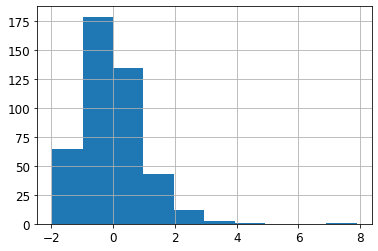

In [46]:
ax = valid_xs_final['GrLivArea'].hist()

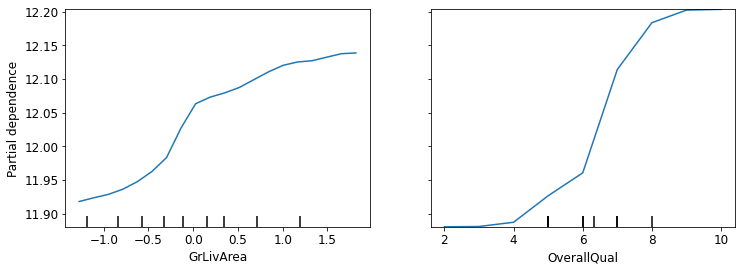

In [47]:
from sklearn.inspection import plot_partial_dependence

fig,ax = plt.subplots(figsize=(12, 4))
plot_partial_dependence(rfr, valid_xs_final, ['GrLivArea','OverallQual'],
                        grid_resolution=20, ax=ax);

In [48]:
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

df_test['DateSold'] = pd.to_datetime(df_test.YrSold.astype(str) + '/' + df_test.MoSold.astype(str) + '/01')
add_datepart(df_test, 'DateSold')

cont_test,cat_test = cont_cat_split(df_test, max_card=25, dep_var=None)
procs_test = [Categorify, FillMissing, Normalize]
to_test = TabularPandas(df_test, procs_test, cat_test, cont_test, y_names=None)

xs_test = to_test.train.xs[list(xs_final.columns)]

predicted_prices = rfr.predict(xs_test)

my_submission = pd.DataFrame({'Id': df_test.Id, 'SalePrice': np.exp(predicted_prices)})

my_submission.to_csv('submission_rfr.csv', index=False)

## XGBoost

In [ ]:
# Start with original training and validation set: (xs,y), (valid_xs,valid_y) 
# and perform a hyperparameter-tuning

from xgboost import XGBRegressor
from xgboost import plot_importance


params = {"learning_rate"    : [ 0.05, 0.10, 0.20, 0.4] ,
          "max_depth"        : [ 3, 6, 9, 12],
          "min_child_weight" : [ 1, 3, 5, 7 ],
          "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
          "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
          "n_estimators"     : [ 40, 100, 500]}

xgbr = XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_root_mean_squared_error',
                   n_jobs=-1)

clf.fit(xs, y)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_))

In [ ]:
xgr = XGBRegressor(n_estimators=100,
                 max_depth=3,
                 learning_rate=0.1).fit(xs, y)

m_rmse(xgr, xs, y), m_rmse(xgr, valid_xs, valid_y)

## Neural Network

In [98]:
df_nn = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

df_nn['DateSold'] = pd.to_datetime(df_nn.YrSold.astype(str) + '/' + df_nn.MoSold.astype(str) + '/01')
df_nn.drop(['MoSold', 'YrSold'], axis=1, inplace=True)
add_datepart(df_nn, 'DateSold')

df_nn[dep_var] = np.log(df_nn[dep_var])

cont_nn,cat_nn = cont_cat_split(df_nn_final, max_card=25, dep_var=dep_var)
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn_final, procs_nn, cat_nn, cont_nn,
                      splits=splits, y_names=dep_var)

In [99]:
dls = to_nn.dataloaders(bs=64)

In [100]:
dls.show_batch()

,OverallQual,GarageCars,FullBath,KitchenQual,ExterQual,Fireplaces,BsmtQual,Foundation,CentralAir,HalfBath,GarageFinish,GarageType,OverallCond,MSSubClass,BedroomAbvGr,Neighborhood,MSZoning,LotFrontage_na,MasVnrArea_na,GrLivArea,YearBuilt,TotalBsmtSF,YearRemodAdd,2ndFlrSF,LotArea,BsmtFinSF1,OpenPorchSF,LotFrontage,WoodDeckSF,BsmtUnfSF,MasVnrArea,SalePrice
0,6,1,1,Ex,TA,1,TA,CBlock,Y,0,RFn,Basment,7,80,2,Edwards,RL,False,False,1357.000002,1959.000000,1019.000000,2005.999999,0.000012,11511.999996,719.000001,-0.000001,124.000002,-0.000003,300.000009,84.000000,12.083905
1,6,2,2,Gd,Gd,0,Gd,PConc,Y,1,Fin,Attchd,5,60,3,CollgCr,RL,False,False,1476.000000,2004.999999,737.999989,2005.000000,738.000003,8633.000055,192.999996,35.000000,64.000000,100.000000,545.000000,-0.000004,12.063932
2,6,1,1,TA,TA,1,TA,CBlock,Y,1,Unf,Detchd,7,70,3,Crawfor,RL,False,False,1659.999994,1934.000000,714.999996,1995.000000,810.999984,11988.000033,326.000001,-0.000001,74.000000,-0.000003,388.999993,-0.000004,12.147914
3,6,2,2,Gd,Gd,1,Gd,PConc,Y,1,Fin,BuiltIn,5,60,3,Gilbert,RL,False,False,1559.999999,2004.999999,683.999994,2005.000000,875.999994,11910.999975,0.000002,38.000000,122.000002,100.000000,683.999998,-0.000004,12.066811
4,5,2,2,TA,TA,0,TA,BrkTil,N,0,Unf,Detchd,5,190,5,OldTown,RM,False,False,2337.000006,1900.000004,662.000009,1949.999999,915.000000,13599.999915,0.000002,57.000000,85.000000,-0.000003,661.999998,-0.000004,11.407565
5,5,2,1,Gd,TA,0,TA,CBlock,Y,0,RFn,Attchd,7,20,3,Sawyer,RL,False,False,893.999975,1967.000000,894.000003,2003.000000,0.000012,9764.000004,701.999996,-0.000001,57.000000,-0.000003,191.999996,-0.000004,11.775290
6,6,2,1,TA,Gd,1,Gd,CBlock,Y,1,RFn,Attchd,6,20,3,Veenker,RL,True,False,1207.999990,1977.000000,1207.999996,1977.000000,0.000012,11250.000031,767.000007,42.000000,69.000000,198.000000,441.000003,-0.000004,12.013700
7,7,2,2,Gd,Gd,0,Gd,PConc,Y,1,Unf,Detchd,5,160,2,Somerst,FV,False,False,1251.999989,1998.999999,600.000006,2000.000000,628.000002,2159.999799,510.000002,48.000000,24.000000,-0.000003,89.999981,212.000000,11.982929
8,10,3,2,Ex,Ex,1,Ex,PConc,Y,1,RFn,BuiltIn,5,60,3,NridgHt,RL,False,False,2296.000004,2007.999999,1721.999999,2008.000000,567.999997,13478.000097,1338.000010,273.999993,96.999999,382.000000,384.000004,420.000001,13.021327
9,5,2,1,Gd,TA,0,TA,PConc,Y,1,Unf,Detchd,5,20,3,SawyerW,RL,False,False,1114.000000,2004.000001,1114.000003,2003.999999,0.000012,13695.000024,645.999997,102.000000,66.000000,-0.000003,467.999999,-0.000004,11.976660


In [101]:
# It's a good idea to set y_range for regression models, so let's find the min and max of our dependent variable:

y = to_nn.train.y
y.min(),y.max()

(10.46024227142334, 13.534473419189453)

In [102]:
learn = tabular_learner(dls, y_range=(10,14),
                        n_out=1, loss_func=F.mse_loss)

SuggestedLRs(valley=0.0006918309954926372)

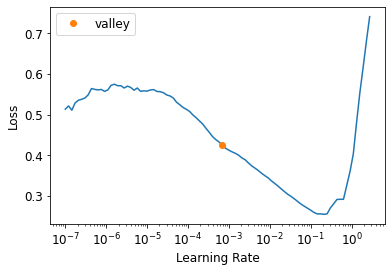

In [103]:
learn.lr_find()

In [104]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,time
0,0.227961,0.116709,00:00
1,0.124707,0.051663,00:00
2,0.083741,0.031492,00:00
3,0.061476,0.026788,00:00
4,0.047070,0.025647,00:00


In [105]:
dl = learn.dls.test_dl(valid_xs)
pred = learn.get_preds(dl=dl)[0].numpy()
#rmse(pred.T.flatten(),valid_y.values)
#round(math.sqrt(((pred-y)**2).mean()), 6)
math.sqrt(((pred.T.flatten() - valid_y.values)**2.).mean())

2.074170817882797

In [106]:
learn.save('nn')

Path('models/nn.pth')

In [ ]:
dl = learn.dls.test_dl(xs_test)
learn.get_preds(dl=dl)

my_submission = pd.DataFrame({'Id': df_test.Id, 'SalePrice': np.exp(predicted_prices)})
my_submission.to_csv('submission_nn.csv', index=False)

| Model | Training Score | Valid Score | Test Score |
|--|--|--|--|
| DecisionTreeRegressor | 0.215144 | 0.234927 | not submitted |
| RandomForestRegressor | 0.105759 | 0.141392 | 0.17211 |
| XGBoost | XX | XX | XX |
| Neural Network | XX | XX | XX |